# Facial Recognition Project
##### Group 4

### Import videos and packages

In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import os
import sys
from pathlib import Path
from PIL import Image, ImageOps

# open source implementation of LBP
from skimage.feature import local_binary_pattern
from sklearn import preprocessing, metrics
from sklearn.svm import LinearSVC, SVC

import seaborn as sns

In [25]:
PYTHONPATH = sys.path[0]
PATHtrain = PYTHONPATH +'\\train'
PATHtest = PYTHONPATH +'\\test'
PATHtrain2 = PYTHONPATH +'\\trainImage'
PATHtest2 = PYTHONPATH +'\\testImage'


names = ["Dallin", "Jason", "Josh",  "Kyle", "Logan","Nathan" ] ### Name of people who we are adding to train/test folders

def path(name):
    ## make folders for training and test data
    script_path = os.path.realpath(PYTHONPATH)
    new_abs_path = os.path.join(script_path)
    if not os.path.exists(new_abs_path):
      os.mkdir(new_abs_path)

    script_path = os.path.realpath(PYTHONPATH)
    new_abs_path = os.path.join(script_path, 'train')
    if not os.path.exists(new_abs_path):
      os.mkdir(new_abs_path)

    script_path = os.path.realpath(PYTHONPATH)
    new_abs_path = os.path.join(script_path, 'test')
    if not os.path.exists(new_abs_path):
      os.mkdir(new_abs_path)

    script_path = os.path.realpath(PYTHONPATH)
    new_abs_path = os.path.join(script_path, 'trainImage')
    if not os.path.exists(new_abs_path):
      os.mkdir(new_abs_path)

    script_path = os.path.realpath(PYTHONPATH)
    new_abs_path = os.path.join(script_path, 'testImage')
    if not os.path.exists(new_abs_path):
      os.mkdir(new_abs_path)

    script_path = os.path.realpath(PATHtrain)
    new_abs_path = os.path.join(script_path, name)
    if not os.path.exists(new_abs_path):
      os.mkdir(new_abs_path)

    script_path = os.path.realpath(PATHtest)
    new_abs_path = os.path.join(script_path, name)
    if not os.path.exists(new_abs_path):
      os.mkdir(new_abs_path)

    script_path = os.path.realpath(PATHtrain2)
    new_abs_path = os.path.join(script_path, name)
    if not os.path.exists(new_abs_path):
      os.mkdir(new_abs_path)

    script_path = os.path.realpath(PATHtest2)
    new_abs_path = os.path.join(script_path, name)
    if not os.path.exists(new_abs_path):
      os.mkdir(new_abs_path)

In [26]:
for name in names:
    path(name) # creates paths for each name

In [14]:
def frames(name):
    PATHtrainNEW = PATHtrain2 + '\\' + name
    PATHtestNEW = PATHtest2 + '\\' + name


    vidcap = cv2.VideoCapture(name + '.mp4') ### mp4 file needs to be name.mp4 EXAMPLE kyle.mp4
    success,image = vidcap.read()
    count = 0;
    print("I am in success")
    while success:
        # Resize image
        scale_percent = 60 # percent of original size # was 30
        width = int(image.shape[1] * scale_percent / 100)
        height = int(image.shape[0] * scale_percent / 100)
        dim = (width, height)
        resize = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
        # Write to folder
        if count%5 == 0:
            cv2.imwrite(os.path.join(PATHtestNEW,"frame%d.png") % count, resize)
        else:
            cv2.imwrite(os.path.join(PATHtrainNEW,"frame%d.png") % count, resize)
        success,image = vidcap.read()
        if cv2.waitKey(10) == 27:
            break
        count += 1
    print(f'{name} Complete')

In [27]:
for name in names:
    frames(name) # creates frames from videos for each person

I am in success
Dallin Complete
I am in success
Jason Complete
I am in success
Josh Complete
I am in success
Kyle Complete
I am in success
Logan Complete
I am in success
Nathan Complete


Get just face now -- Rerun for each name

In [48]:
name = 'Nathan' # have to repeat this part for each name

In [49]:
import sys
import os
import numpy as np


PYTHONPATH = sys.path[0]
PATHtrain = PYTHONPATH +'\\train'
PATHtest = PYTHONPATH +'\\test'
PATHtrain2 = PYTHONPATH +'\\trainImage'
PATHtest2 = PYTHONPATH +'\\testImage'

PATHtrainNEW = PATHtrain2 + '\\' + name
PATHtestNEW = PATHtest2 + '\\' + name

PYTHONPATH = sys.path[0]
PATHtrain = PYTHONPATH +'\\train'
PATHtest = PYTHONPATH +'\\test'

#name = 'Dallin'

PATHtestFace = PATHtest + '\\' + name
PATHtrainFace = PATHtrain + '\\' + name

PATHtrainNEW = PATHtrain2 + '\\' + name
PATHtestNEW = PATHtest2 + '\\' + name

For test data

done


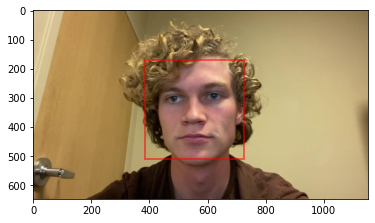

In [50]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2
import urllib.request
from PIL import Image

# download cascade classifier configuration
url = 'http://apmonitor.com/pds/uploads/Main/cascade.xml'
urllib.request.urlretrieve(url, 'cascade.xml')

def draw_faces(data, result_list):
    for i in range(len(result_list)):
        x1, y1, width, height = result_list[i]
        x2, y2 = x1 + width, y1 + height
        #plt.subplot(1, len(result_list), i+1)
        plt.axis('off')
        plt.imshow(data[y1:y2, x1:x2])
        filename = 'face%d.png'%j
        plt.savefig(os.path.join(PATHtestFace,filename))
        plt.close()


        
totalFrame = 500
for j in np.arange(0,totalFrame,5):
    try:
        img_png = Image.open(os.path.join(PATHtestNEW,'frame%d.png')%j)
        img_png.save(os.path.join(PATHtestNEW,'frame%d.jpg')%j)
        pixels = plt.imread(os.path.join(PATHtestNEW,'frame%d.jpg')%j)

        faceCascade = cv2.CascadeClassifier('cascade.xml')
        gray = cv2.cvtColor(pixels, cv2.COLOR_BGR2GRAY)
        faces = faceCascade.detectMultiScale(gray,scaleFactor=1.1,
                                             minNeighbors=2,\
                                             minSize=(30, 30))

        # display only the faces
        draw_faces(pixels, faces)            

        # display identified faces on original image
        fig, ax = plt.subplots(); ax.imshow(pixels)
        for (x, y, w, h) in faces:
            rect = patches.Rectangle((x, y), w, h, lw=2, \
                                     alpha=0.5, edgecolor='r', \
                                     facecolor='none')
            ax.add_patch(rect)

        #plt.show()
    except:
        print('done')
        break


For training data

C:\Users\dlitt\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


done


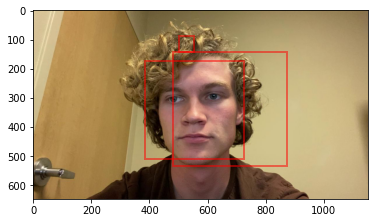

In [51]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2
import urllib.request
from PIL import Image

# download cascade classifier configuration
url = 'http://apmonitor.com/pds/uploads/Main/cascade.xml'
urllib.request.urlretrieve(url, 'cascade.xml')

def draw_faces(data, result_list):
    for i in range(len(result_list)):
        x1, y1, width, height = result_list[i]
        x2, y2 = x1 + width, y1 + height
        #plt.subplot(1, len(result_list), i+1)
        plt.axis('off')
        plt.imshow(data[y1:y2, x1:x2])
        filename = 'face%d.png'%j
        plt.savefig(os.path.join(PATHtrainFace,filename))
        plt.close()

        
totalFrame = 500
for j in np.arange(0,totalFrame):
    if j%5 != 0:
        try:
            img_png = Image.open(os.path.join(PATHtrainNEW,'frame%d.png')%j)
            img_png.save(os.path.join(PATHtrainNEW,'frame%d.jpg')%j)
            pixels = plt.imread(os.path.join(PATHtrainNEW,'frame%d.jpg')%j)

            faceCascade = cv2.CascadeClassifier('cascade.xml')
            gray = cv2.cvtColor(pixels, cv2.COLOR_BGR2GRAY)
            faces = faceCascade.detectMultiScale(gray,scaleFactor=1.1,
                                                 minNeighbors=2,\
                                                 minSize=(30, 30))

            # display only the faces
            draw_faces(pixels, faces)            

            # display identified faces on original image
            fig, ax = plt.subplots(); ax.imshow(pixels)
            for (x, y, w, h) in faces:
                rect = patches.Rectangle((x, y), w, h, lw=2, \
                                         alpha=0.5, edgecolor='r', \
                                         facecolor='none')
                ax.add_patch(rect)

            #plt.show()
        except:
            print('done')
            break

AT THIS POINT YOU WILL NEED TO LOOK AT DATA AND DELETE EXTRA PNG/JPG FILES AND TRAINING/TEST DATA THAT IS BAD

### classification

In [52]:
import os
import re
import cv2
import time
import shutil
import zipfile
import urllib.request
import numpy as np
from PIL import Image
from os import listdir
from os.path import isfile, join
from random import randrange
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [90]:
# Initiate data processing tools
training_data_directory = 'train'
test_data_directory = 'test'

training_data_processor = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    zoom_range = 0.2,
    rotation_range = 10,
    shear_range = 0.2,
    height_shift_range = 0.1,
    width_shift_range = 0.1
)

test_data_processor = ImageDataGenerator(rescale = 1./255)

# Load data into Python
training_data = training_data_processor.flow_from_directory(
    training_data_directory,
    target_size = (256, 256),
    batch_size = 32,
    class_mode = 'categorical',
    shuffle = False
)

testing_data = test_data_processor.flow_from_directory(
    test_data_directory,
    target_size = (256 ,256),
    batch_size = 32,
    class_mode = 'categorical',
    shuffle = False
)

Found 1437 images belonging to 6 classes.
Found 364 images belonging to 6 classes.


In [54]:
# choose model parameters
num_conv_layers = 3 # This was 3 but I chaned to 6. Could be incorrect
num_dense_layers = 1
layer_size = 32
num_training_epochs = 10
MODEL_NAME = 'Faces'

In [55]:
# Initiate model variable
model = Sequential()

# begin adding properties to model variable
# e.g. add a convolutional layer
model.add(Conv2D(layer_size, (3, 3), input_shape=(256,256, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# add additional convolutional layers based on num_conv_layers
for _ in range(num_conv_layers-1):
    model.add(Conv2D(layer_size, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

# reduce dimensionality
model.add(Flatten())

# add fully connected "dense" layers if specified
for _ in range(num_dense_layers):
    model.add(Dense(layer_size))
    model.add(Activation('relu'))

# add output layer
model.add(Dense(6)) # Was 3 but definately needs to be 6
model.add(Activation('softmax'))

# compile the sequential model with all added properties
model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'],
                )

# use the data already loaded previously to train/tune the model
model.fit(training_data,
            epochs=num_training_epochs,
            validation_data = testing_data)

# save the trained model
model.save(f'{MODEL_NAME}.h5')

Epoch 1/10
45/45 [==============================] - 40s 876ms/step - loss: 1.7240 - accuracy: 0.2060 - val_loss: 1.4018 - val_accuracy: 0.2445
Epoch 2/10
45/45 [==============================] - 33s 729ms/step - loss: 1.3171 - accuracy: 0.3292 - val_loss: 1.1385 - val_accuracy: 0.4423
Epoch 3/10
45/45 [==============================] - 32s 705ms/step - loss: 1.0483 - accuracy: 0.4913 - val_loss: 0.8184 - val_accuracy: 0.7033
Epoch 4/10
45/45 [==============================] - 32s 700ms/step - loss: 0.7499 - accuracy: 0.7196 - val_loss: 0.5805 - val_accuracy: 0.8242
Epoch 5/10
45/45 [==============================] - 32s 694ms/step - loss: 0.6434 - accuracy: 0.8128 - val_loss: 0.5374 - val_accuracy: 0.8984
Epoch 6/10
45/45 [==============================] - 32s 694ms/step - loss: 0.5685 - accuracy: 0.8295 - val_loss: 0.3299 - val_accuracy: 0.9423
Epoch 7/10
45/45 [==============================] - 31s 691ms/step - loss: 0.3034 - accuracy: 0.9235 - val_loss: 0.1844 - val_accuracy: 0.9533

## Check Accuracy

In [56]:
def make_prediction(image_fp):
    im = cv2.imread(image_fp) # load image
    #plt.imshow(im[:,:,[2,1,0]])
    img = image.load_img(image_fp, target_size = (256,256))
    img = image.img_to_array(img)

    image_array = img / 255. # scale the image
    img_batch = np.expand_dims(image_array, axis = 0)
    
    class_ = ["Dallin", "Jason", "Josh",  "Kyle", "Logan","Nathan" ] # possible output values
    predicted_value = class_[model.predict(img_batch).argmax()]
    true_value = re.search(r'(Dallin)|(Nathan)|(Jason)|(Logan)|(Kyle)|(Josh)', image_fp)[0]
    
    out = f"""Predicted Face: {predicted_value}
    True Face: {true_value}
    Correct?: {predicted_value == true_value}"""
    
    return out

In [57]:
def make_predict(image_fp):
    im = cv2.imread(image_fp) # load image
    #plt.imshow(im[:,:,[2,1,0]])
    img = image.load_img(image_fp, target_size = (256,256))
    img = image.img_to_array(img)

    image_array = img / 255. # scale the image
    img_batch = np.expand_dims(image_array, axis = 0)
    
    class_ = ["Dallin", "Jason", "Josh",  "Kyle", "Logan","Nathan" ] # possible output values
    predicted_value = class_[model.predict(img_batch).argmax()]
    #true_value = re.search(r'(Dallin)|(Nathan)|(Jason)|(Logan)|(Kyle)|(Josh)', image_fp)[0]
    
    out = f"""{predicted_value}"""
    
    return out

In [58]:
name = 'Dallin'
test_image_filepath = PATHtestFace = PATHtest + '\\' + name + '\\' + 'face45.png'
print(make_prediction(test_image_filepath))
print(make_predict(test_image_filepath))

Predicted Face: Dallin
    True Face: Dallin
    Correct?: True
Dallin


## Training Set Confusion Matrix

C:\Users\dlitt\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


Accuracy: 95.20%


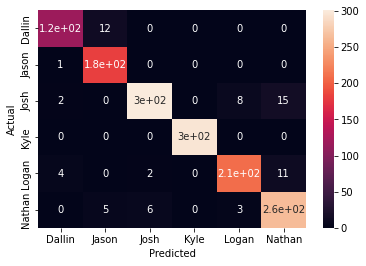

In [91]:
predictions = model.predict_generator(training_data)
predictions_rounded = []
for i in predictions:
    predictions_rounded.append(i.argmax())
    
cmat = metrics.confusion_matrix(training_data.classes,predictions_rounded)
s = sns.heatmap(cmat,annot=True,xticklabels=names,yticklabels=names)
s.set(xlabel='Predicted', ylabel='Actual')
acc = cmat.trace()/cmat.sum()
print('Accuracy: {0:5.2f}%'.format(acc*100))

## Test Set Confusion Matrix

In [87]:
predictions = model.predict_generator(testing_data)

C:\Users\dlitt\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


In [88]:
predictions_rounded = []
for i in predictions:
    predictions_rounded.append(i.argmax())

Accuracy: 95.33%


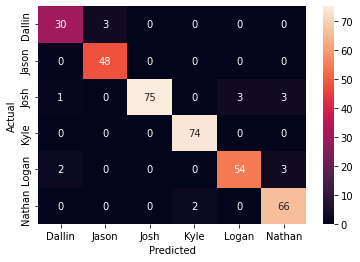

In [89]:
cmat = metrics.confusion_matrix(testing_data.classes,predictions_rounded)
s = sns.heatmap(cmat,annot=True,xticklabels=names,yticklabels=names)
s.set(xlabel='Predicted', ylabel='Actual')
acc = cmat.trace()/cmat.sum()
print('Accuracy: {0:5.2f}%'.format(acc*100))

### Basic Code to run in class

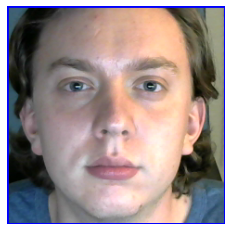

In [92]:
import cv2
import time
import urllib.request
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os
import sys

PYTHONPATH = sys.path[0]
PATHcurrent = PYTHONPATH

present = []

def draw_faces(data, result_list):
    for i in range(len(result_list)):
        x1, y1, width, height = result_list[i]
        x2, y2 = x1 + width, y1 + height
        #plt.subplot(1, len(result_list), i+1)
        plt.axis('off')
        plt.imshow(data[y1:y2, x1:x2])
        #k = str(count) + str(i)
        #filename = 'face%s.png'%k

        filename = 'face%d.png'%i
        
        plt.savefig(os.path.join(PATHcurrent,filename))
        
        test_image_filepath = PATHcurrent + '\\' + filename
        ans = make_predict(test_image_filepath)
        
        if ans not in present:
            present.append(ans)
            
        #plt.show()
        time.sleep(1)

# download cascade classifier configuration
url = 'http://apmonitor.com/pds/uploads/Main/cascade.xml'
urllib.request.urlretrieve(url, 'cascade.xml')

faceCascade = cv2.CascadeClassifier('cascade.xml')
video_capture = cv2.VideoCapture(0)

t = time.time()
count = 0
while time.time()-t <=5: # run for max 5 sec

    ret, frame = video_capture.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray,scaleFactor=1.1,
        minNeighbors=5,minSize=(30, 30))
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
    cv2.imshow('Video', frame)
    # Resize image
    scale_percent = 60 # percent of original size # was 30
    width = int(frame.shape[1] * scale_percent / 100)
    height = int(frame.shape[0] * scale_percent / 100)
    dim = (width, height)
    resize = cv2.resize(frame, dim, interpolation = cv2.INTER_AREA)
    
    cv2.imwrite('image%d.png'%count,frame)
    
    
    pixels = plt.imread('image%d.png'%count)
    count+=1
    
    if len(faces) > 0:
        draw_faces(pixels,faces)
        
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

 
video_capture.release()
cv2.destroyAllWindows()


## Full code to run in class

Dallin entered class at 20:30:46
Sent to logan.stewart.brown@gmail.com
Sent to jason.ishoy@gmail.com
Sent to hansen.nate98@gmail.com
Sent to 17jsweeten1@gmail.com
Sent to kmanwaring32@gmail.com


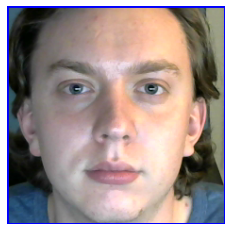

In [93]:
import cv2
import time
import urllib.request
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os
import sys
import time
import pyttsx3

totalRunTime = 20 # seconds

PYTHONPATH = sys.path[0]
PATHcurrent = PYTHONPATH

present = []
ans = []

def draw_faces(data, result_list):
    for i in range(len(result_list)):
        x1, y1, width, height = result_list[i]
        x2, y2 = x1 + width, y1 + height
        #plt.subplot(1, len(result_list), i+1)
        plt.axis('off')
        plt.imshow(data[y1:y2, x1:x2])
        #k = str(count) + str(i)
        #filename = 'face%s.png'%k

        filename = 'face%d.png'%i
        
        plt.savefig(os.path.join(PATHcurrent,filename))
        
        test_image_filepath = PATHcurrent + '\\' + filename
        ans = make_predict(test_image_filepath)
        ans1 = [ans]
        
        
        if ans not in present:
            
            engine = pyttsx3.init()
            for i in ans1:
                if ans not in present:
                    engine.say("Welcome to class, "+i)
                    engine.runAndWait()
            present.append(ans)
            for k in range(len(ans1)):
                print(f'{ans1[k]} entered class at {time.strftime("%H:%M:%S")}')
            
        #plt.show()
        time.sleep(1)

# download cascade classifier configuration
url = 'http://apmonitor.com/pds/uploads/Main/cascade.xml'
urllib.request.urlretrieve(url, 'cascade.xml')

faceCascade = cv2.CascadeClassifier('cascade.xml')
video_capture = cv2.VideoCapture(0)

t = time.time()
count = 0
while time.time()-t <=totalRunTime: # run for max 5 sec

    ret, frame = video_capture.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray,scaleFactor=1.1,
        minNeighbors=5,minSize=(30, 30))
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
    cv2.imshow('Video', frame)
    # Resize image
    scale_percent = 60 # percent of original size # was 30
    width = int(frame.shape[1] * scale_percent / 100)
    height = int(frame.shape[0] * scale_percent / 100)
    dim = (width, height)
    resize = cv2.resize(frame, dim, interpolation = cv2.INTER_AREA)
    
    cv2.imwrite('image%d.png'%count,frame)
    
    
    pixels = plt.imread('image%d.png'%count)
    count+=1
    
    if len(faces) > 0:
        draw_faces(pixels,faces)
        
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

 
video_capture.release()
cv2.destroyAllWindows()
    
    
    
### Email


import pandas as pd
import numpy as np
import smtplib
from email.mime.text import MIMEText
from getpass import getpass


From ='Instructor <instructor@example.com>'
username ='my_username'
smtp_server ='mail.et.byu.edu'
password = '1234'

students = pd.DataFrame({'First': ['Logan', 'Jason', 'Nathan', 'Josh', 'Kyle', 'Dallin'],
                         'Email': ['logan.stewart.brown@gmail.com', 'jason.ishoy@gmail.com', 'hansen.nate98@gmail.com',
                                   '17jsweeten1@gmail.com', 'kmanwaring32@gmail.com', 'dlittlewood12@gmail.com']})

def sendEmail(Subject, bodyText, To, pw):
    msg = MIMEText(bodyText)
    msg['Subject'] = Subject
    msg['From']    = From
    msg['To']      = To
    #server = smtplib.SMTP(smtp_server)
    #server.starttls()
    #server.login(username, password)
    #server.send_message(msg)
    #server.quit()

    print('Sent to ' + To)

Message = '''We missed you in class today. We hope you are doing well.

Today we worked on the project for facial recognition.

Best regards,

Group 4
Brigham Young University'''


for i in present:
    students = students[(students['First']) != i]

students = students.reset_index(drop=True)

for i in range(len(students)):
    
    if students.empty == True:
        print('No absent students')
    
    else:
        bdTxt = students.First[i] + ',\n\n' + Message

        To = students.Email[i]
        Subject = "Hi " + students.First[i] + ", we missed you today"
        sendEmail(Subject,bdTxt,To,password)

In [ ]:
video_capture.release()
cv2.destroyAllWindows()